In [1]:
import quandl, math
import numpy as np
import pandas as pd
from sklearn import preprocessing, svm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from matplotlib import style
import datetime


In [2]:
style.use('ggplot')
df = quandl.get("WIKI/GOOGL")
df = df[['Adj. Open',  'Adj. High',  'Adj. Low',  'Adj. Close', 'Adj. Volume']]
df['HL_PCT'] = (df['Adj. High'] - df['Adj. Low']) / df['Adj. Close'] * 100.0
df['PCT_change'] = (df['Adj. Close'] - df['Adj. Open']) / df['Adj. Open'] * 100.0

In [1]:
df = df[['Adj. Close', 'HL_PCT', 'PCT_change', 'Adj. Volume']]
forecast_col = 'Adj. Close'
df.fillna(value=-99999, inplace=True)
forecast_out = int(math.ceil(0.01 * len(df))) 
df['label'] = df[forecast_col].shift(-forecast_out)

NameError: name 'df' is not defined

In [4]:
X = np.array(df.drop(['label'], 1))
X = preprocessing.scale(X)
#preprocessing func
X_lately = X[-forecast_out:]
#selects last 35 values
X = X[:-forecast_out]
#selects all but those 35 values
df.dropna(inplace=True)

y = np.array(df['label'])


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
clf = LinearRegression(n_jobs=-1)
clf.fit(X_train, y_train)
# regression line fits x & y train
confidence = clf.score(X_test, y_test)
# score on test data

forecast_set = clf.predict(X_lately)
#predict on X_lately
df['Forecast'] = np.nan
#new col with nan values
last_date = df.iloc[-1].name
last_unix = last_date.timestamp()
one_day = 86400
next_unix = last_unix + one_day


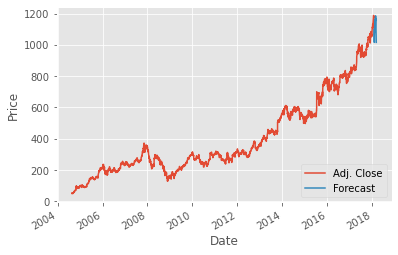

In [6]:
for i in forecast_set:
    next_date = datetime.datetime.fromtimestamp(next_unix)
    next_unix += 86400
    df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)]+[i]

df['Adj. Close'].plot()
df['Forecast'].plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

In [7]:
df.tail(50)

,Adj. Close,HL_PCT,PCT_change,Adj. Volume,label,Forecast
Date,,,,,,
2018-01-16 00:00:00,1130.70,1.965154,-0.842753,1783881.0,1115.04,NaN
2018-01-17 00:00:00,1139.10,1.389694,0.241121,1353097.0,1129.38,NaN
2018-01-18 00:00:00,1135.97,1.419932,-0.296660,1333633.0,1160.84,NaN
2018-01-19 00:00:00,1143.50,0.986445,0.480655,1418376.0,1165.93,NaN
2018-01-22 00:00:00,1164.16,2.152625,1.778252,1437954.0,1139.91,NaN
2018-01-23 00:00:00,1176.17,0.957345,0.474108,1832126.0,1148.89,NaN
2018-01-24 00:00:00,1171.29,1.677637,-1.155294,1818182.0,1150.61,NaN
2018-01-25 00:00:00,1182.14,1.113235,0.121114,1398961.0,1134.42,NaN
2018-01-26 00:00:00,1187.56,1.644548,0.002526,1981476.0,1100.07,NaN


In [8]:
import pickle

In [9]:
with open('linearregression.pickle','wb') as f:
    pickle.dump(clf, f)

In [10]:
pickle_in = open('linearregression.pickle','rb')
clf = pickle.load(pickle_in)